In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Connecting to the database

In [3]:
from sqlalchemy import create_engine
from sqlalchemy.engine import URL

In [5]:

import psycopg2
hostname = 'localhost'
database = 'nyfd'
user_name = 'postgres'
pwd = 'raksha' 
port_id= 5432
conn=None
cur=None


In [7]:
engine = create_engine(f'postgresql://{user_name}:{pwd}@{hostname}:{port_id}/{database}')


In [9]:
sql = "SELECT * FROM public.insp"

In [11]:
insp = pd.read_sql_query(sql,engine)
insp.sample(14)

,facility,address,date_of_inspection,violation_item,violation_description,critical_violation,total_critical_violations,total_crit_not_corrected,total_noncritical_violations,local_health_department,...,permitted_dba,permitted_corp_name,perm_operator_last_name,perm_operator_first_name,nys_health_operation_id,inspection_type,inspection_comments,fs_facility_state,latitude,longitude
256784,GLEN ST FOOD CENTER & GROCERY,"33 GLEN STREET, GLEN COVE",4/23/2019,16,"Miscellaneous, Economic Violation, Choking Pos...",Not Critical Violation,1.0,0.0,6.0,Nassau County,...,None,LTMN CORP,None,None,1014190.0,Re-Inspection,Nassau County Food Manager Training Certificat...,NY,NaN,NaN
868178,MALONE MIDDLE SCHOOL,"15 FRANCIS STREET, MALONE",5/24/2016,11D,Non food contact surfaces of equipment not clean,Not Critical Violation,0.0,0.0,2.0,Saranac Lake District Office,...,None,"ARAMARK EDUCATIONAL SERVICES, LLC",POTTER,VICKIE,845419.0,Inspection,Facility is using time as a public health cont...,NY,44.846259,-74.296187
412542,CHINATOWN KITCHEN - LIBERTY VILLAGE,"127 Route 52 East, Liberty",4/24/2018,15A,"Floors, walls, ceilings, not smooth, properly ...",Not Critical Violation,1.0,0.0,14.0,Middletown District Office,...,None,Liberty Chinatown Inc.,Zheng,Tian He,347759.0,Inspection,"Steam table - egg drop soup 154F, wontons 144F...",NY,41.784024,-74.719861
1131266,GEORGE W. MILLER ELEMENTARY SCHOOL,"50 BLAUVELT ROAD, NANUET",10/4/2021,None,None,Not Critical Violation,0.0,0.0,0.0,Rockland County,...,GEORGE W. MILLER ELEMENTARY SCHOOL,NANUET UNION FREE SCHOOLS,GREGOR,MARYANN,303305.0,Inspection,"No violations noted at this time, recommend is...",NY,41.085784,-74.006101
617213,HAPPY GROUP CHINESE RESTAURANT,"1150 MERRICK AVENUE, NORTH MERRICK",2/1/2024,8A,"Food not protected during storage, preparation...",Not Critical Violation,0.0,0.0,4.0,Nassau County,...,None,"HAPPY WOK 1150, INC.",None,None,1102040.0,Re-Inspection,None,NY,NaN,NaN
777308,RESTAURANT 7,"96 WASHINGTON STREET, POUGHKEEPSIE",1/13/2023,10B,Non-food contact surfaces and equipment are im...,Not Critical Violation,1.0,0.0,8.0,Dutchess County,...,None,ACUARIO SERVICES INC,REYES,JESUS,1075460.0,Inspection,Capacity 19,NY,NaN,NaN
1132890,OSWEGO THEATRE,"138 WEST SECOND STREET, OSWEGO",11/23/2004,None,None,Not Critical Violation,NaN,NaN,NaN,Oswego County,...,OSWEGO THEATRE,ZURICH CINEMAS OF OSWEGO,LEE,RYAN,296578.0,Inspection,None,NY,43.455898,-76.512167
752594,CARLTON RECREATION HALL,"1853 OAK ORCHARD ROAD, ALBION, NEW YORK",7/17/2015,13B,Garbage storage areas not properly constructed...,Not Critical Violation,1.0,0.0,11.0,Orleans County,...,None,CARLTON FIRE CO NO. 1,YOCKEL,THOMAS,295041.0,Inspection,James Tabor was present during inspection. He ...,NY,43.323958,-78.190804
401869,Mullin's Catering,"1180A US Highway 11, Gouverneur",10/2/2012,12E,"Handwashing facilities inaccessible, improperl...",Not Critical Violation,0.0,0.0,22.0,Canton District Office,...,None,Mullin's Catering & Take-Out LLC,Mullin,Daniel & Tina,583370.0,Inspection,None,NY,44.323291,-75.483858
1124251,GUIDO'S FROZEN DESSERTS,"160 QUAIL STREET, ALBANY",4/26/1995,None,None,Not Critical Violation,NaN,NaN,NaN,Albany County,...,None,"AMMG, INC.",GUIDO,MARK,251213.0,Inspection,None,NY,42.663112,-73.775838


SHAPE OF THE DATASET

In [13]:
insp.shape

(1310873, 31)

NULL VALUES

In [15]:
insp.isnull().sum()

facility                             39
address                              41
date_of_inspection                   39
violation_item                   241221
violation_description            241221
critical_violation                   39
total_critical_violations         80801
total_crit_not_corrected          81419
total_noncritical_violations      80672
local_health_department              39
county                               39
facility_code                        39
facility_address                     45
facility_city                       172
facility_postal_zipcode             172
nysdoh_gazetteer                     39
facility_municipality                39
operation_name                       39
permit_expiration_date            15672
food_service_type                    39
food_service_description             39
permitted_dba                   1177058
permitted_corp_name              305477
perm_operator_last_name          334093
perm_operator_first_name         335787


COLUMNS

In [17]:
insp.columns

Index(['facility', 'address', 'date_of_inspection', 'violation_item',
       'violation_description', 'critical_violation',
       'total_critical_violations', 'total_crit_not_corrected',
       'total_noncritical_violations', 'local_health_department', 'county',
       'facility_code', 'facility_address', 'facility_city',
       'facility_postal_zipcode', 'nysdoh_gazetteer', 'facility_municipality',
       'operation_name', 'permit_expiration_date', 'food_service_type',
       'food_service_description', 'permitted_dba', 'permitted_corp_name',
       'perm_operator_last_name', 'perm_operator_first_name',
       'nys_health_operation_id', 'inspection_type', 'inspection_comments',
       'fs_facility_state', 'latitude', 'longitude'],
      dtype='object')

COLUMNS INFO

In [19]:
insp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310873 entries, 0 to 1310872
Data columns (total 31 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   facility                      1310834 non-null  object 
 1   address                       1310832 non-null  object 
 2   date_of_inspection            1310834 non-null  object 
 3   violation_item                1069652 non-null  object 
 4   violation_description         1069652 non-null  object 
 5   critical_violation            1310834 non-null  object 
 6   total_critical_violations     1230072 non-null  float64
 7   total_crit_not_corrected      1229454 non-null  float64
 8   total_noncritical_violations  1230201 non-null  float64
 9   local_health_department       1310834 non-null  object 
 10  county                        1310834 non-null  object 
 11  facility_code                 1310834 non-null  object 
 12  facility_address            

COLUMN STATS

In [21]:
insp.describe()

,total_critical_violations,total_crit_not_corrected,total_noncritical_violations,nysdoh_gazetteer,nys_health_operation_id,latitude,longitude
count,1.230072e+06,1.229454e+06,1.230201e+06,1.310834e+06,1.310834e+06,966442.000000,966442.000000
mean,8.127939e-01,2.876073e-02,5.250862e+00,3.322587e+05,6.106585e+05,42.319222,-75.191260
std,1.436214e+00,2.947295e-01,5.160587e+00,1.717231e+05,2.681871e+05,1.278077,2.384062
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+04,2.500760e+05,-78.976230,-79.761170
25%,0.000000e+00,0.000000e+00,2.000000e+00,2.269000e+05,3.345810e+05,41.293740,-76.199469
50%,0.000000e+00,0.000000e+00,4.000000e+00,3.121000e+05,5.770680e+05,42.459788,-74.422349
75%,1.000000e+00,0.000000e+00,7.000000e+00,4.559000e+05,8.500890e+05,43.090400,-73.791416
max,8.000000e+01,8.800000e+01,9.800000e+01,6.158000e+05,1.148773e+06,46.469864,76.308757


DUPLICATED ROWS

In [23]:
insp.duplicated().sum()

350

In [25]:
insp.drop_duplicates(inplace=True)

In [27]:
insp.duplicated().sum()

0

UNIQUE VALUES IN EACH COLUMN

In [29]:
insp.nunique()

facility                         31971
address                          31989
date_of_inspection                9463
violation_item                      98
violation_description              116
critical_violation                   2
total_critical_violations           27
total_crit_not_corrected            14
total_noncritical_violations        72
local_health_department             45
county                              55
facility_code                    33787
facility_address                 30980
facility_city                     1919
facility_postal_zipcode           1799
nysdoh_gazetteer                  1483
facility_municipality              914
operation_name                   34575
permit_expiration_date             404
food_service_type                    4
food_service_description            26
permitted_dba                     1913
permitted_corp_name              22671
perm_operator_last_name          13745
perm_operator_first_name          7328
nys_health_operation_id  

EDA THROUGH AUTOVIZ

In [16]:
from autoviz import AutoViz_Class
AV = AutoViz_Class()


Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [17]:
import bokeh
import autoviz
import holoviews

print(f"Bokeh version: {bokeh.__version__}")
print(f"AutoViz version: {autoviz.__version__}")
print(f"HoloViews version: {holoviews.__version__}")

Bokeh version: 3.4.2
AutoViz version: 0.1.905
HoloViews version: 1.19.1


In [18]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [31]:
insp['critical_violation'].value_counts()

critical_violation
Not Critical Violation    1157952
Critical Violation         152570
Name: count, dtype: int64

In [20]:
# import pandas as pd
# from sqlalchemy import create_engine
# from autoviz.AutoViz_Class import AutoViz_Class

# # Create database engine
# engine = create_engine(f'postgresql://{user_name}:{pwd}@{hostname}:{port_id}/{database}')

# # SQL query
# sql = "SELECT * FROM public.insp"

# # Load data in chunks and sample
# chunk_size = 100000  # Adjust chunk size as needed
# sampled_chunks = []

# for chunk in pd.read_sql_query(sql, engine, chunksize=chunk_size):
#     # Sample 10% of each chunk
#     sampled_chunk = chunk.sample(frac=0.1, random_state=42)
#     sampled_chunks.append(sampled_chunk)

# # Concatenate all sampled chunks into a single DataFrame
# sampled_insp = pd.concat(sampled_chunks, ignore_index=True)

# # Initialize AutoViz
# AV = AutoViz_Class()
# custom_plot_dir = "vcx"

# # AutoViz on the sampled data
# dft = AV.AutoViz(
#     "",
#     sep=",",
#     depVar="critical_violation",
#     dfte=sampled_insp,
#     header=0,
#     verbose=1,
#     lowess=False,
#     chart_format="bokeh",
#     max_rows_analyzed=1310873,
#     max_cols_analyzed=31,
#     save_plot_dir=custom_plot_dir,
# )


PANDAS PROFILING REPORT

In [21]:
#from ydata_profiling import ProfileReport
#prof = ProfileReport(insp)
#prof.to_file(output_file='output.html')

DATA CLEANING

FILLING NULL VALUES FOR "VIOLATION_ITEM" USING RANDOM IMPUTATION.

In [33]:
def random_impute_categorical(df, column):
    non_null = df[column].dropna()
    random_value = np.random.choice(non_null)
    df[column] = df[column].fillna(random_value)
    

random_impute_categorical(insp, 'violation_item')




In [35]:
insp['violation_item'].isnull().sum()

0

In [37]:
insp.dropna(subset=['critical_violation'], inplace=True)

In [39]:
insp['critical_violation'].isnull().sum()

0

IMPUTING ['total_critical_violations', 'total_crit_not_corrected',
       'total_noncritical_violations']  USING MICE ALGORITHM.

In [41]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [43]:
imputer = IterativeImputer(random_state = 42)

In [45]:
cols =['total_critical_violations', 'total_crit_not_corrected',
       'total_noncritical_violations']
insp[cols] = imputer.fit_transform(insp[cols])

OUTLIERS DETECTION

In [47]:

def detect_outliers(column):
    q1 = insp[column].quantile(0.25)
    q3 = insp[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return insp[(insp[column] < lower_bound) | (insp[column] > upper_bound)]
outliers = detect_outliers('total_critical_violations')

print(outliers)

                                 facility  \
4481     FAIRPORT CSD-MARTHA BROWN MIDDLE   
4978        YESHIVA GEDOLAH ZICHRON MOSHE   
5665                  #1 King's Buffet, A   
5684                   BURGER KING ONEIDA   
5722       MAMA GINA'S PIZZERIA OF FULTON   
...                                   ...   
1291723                 HARBOR CHILD CARE   
1301271   W IRON CSD-DAKE JR. HIGH SCHOOL   
1302398      RIT-CROSSROADS CAFE & MARKET   
1304155                 Hartlot Happening   
1306914  SPRING GARDEN CHINESE RESTAURANT   

                                       address date_of_inspection  \
4481               665 AYRAULT ROAD,  FAIRPORT          11/8/2010   
4978     84 Laurel Park ROAD,  South Fallsburg          3/29/2005   
5665           115 Harte Haven Plaza,  Massena         12/28/2001   
5684               212 GENESEE STREET,  ONEIDA           1/8/2004   
5722          101 SOUTH SECOND STREET,  FULTON          1/29/2003   
...                                        ..

In [30]:
%matplotlib inline
# plt.figure(figsize=(10, 6))
# sns.boxplot(x=insp["total_critical_violations"],hue=insp['critical_violation'])

# plt.show()

In [31]:
# plt.figure(figsize=(10, 6))
# plt.subplot(2,2,1)
# sns.boxplot(x=insp["total_crit_not_corrected"],hue=insp['critical_violation'])
# plt.subplot(2,2,2)
# sns.kdeplot(x=insp['total_crit_not_corrected'])
# plt.show()


In [32]:
# sns.histplot(x='total_crit_not_corrected',data=insp)

In [33]:
# plt.figure(figsize=(10, 6))
# plt.subplot(2,2,1)
# sns.boxplot(x=insp['total_noncritical_violations'],hue=insp['critical_violation'])
# plt.subplot(2,2,2)
# sns.kdeplot(x=insp['total_noncritical_violations'])

CAPPING

In [49]:

lower_limit = insp['total_critical_violations'].quantile(0.01)
upper_limit = insp['total_critical_violations'].quantile(0.99)


insp['total_critical_violations'] = insp['total_critical_violations'].clip(lower_limit, upper_limit)

In [35]:

# plt.figure(figsize=(10, 6))
# sns.boxplot(x=insp["total_critical_violations"],hue=insp['critical_violation'])

# plt.show()

In [36]:

# lower_limit = insp['total_crit_not_corrected'].quantile(0.01)
# upper_limit = insp['total_crit_not_corrected'].quantile(0.99)


# insp['total_crit_not_corrected'] = insp['total_crit_not_corrected'].clip(lower_limit, upper_limit)

# plt.figure(figsize=(10, 6))
# sns.boxplot(x=insp["total_crit_not_corrected"],hue=insp['critical_violation'])

# plt.show()

In [37]:

# lower_limit = insp['total_noncritical_violations'].quantile(0.01)
# upper_limit = insp['total_noncritical_violations'].quantile(0.99)


# insp['total_noncritical_violations'] = insp['total_noncritical_violations'].clip(lower_limit, upper_limit)

# plt.figure(figsize=(10, 6))
# plt.subplot(2,2,1)
# sns.boxplot(x=insp["total_noncritical_violations"],hue=insp['critical_violation'])
# plt.subplot(2,2,2)
# sns.kdeplot(insp['total_noncritical_violations'])
# plt.show()

FEATURE ENG

In [51]:
insp['date_of_inspection']=pd.to_datetime(insp['date_of_inspection'],errors='coerce')
insp['date_of_inspection'].dtype

dtype('<M8[ns]')

FEATURER EXTRACTION FROM "DATE OF INSPECTION" COLUMN

In [53]:
insp['insp_day'] = insp['date_of_inspection'].dt.day 
insp['insp_dayofweek'] = pd.to_datetime(insp['date_of_inspection']).dt.dayofweek
insp['insp_year'] = pd.to_datetime(insp['date_of_inspection']).dt.year
insp['insp_month'] = pd.to_datetime(insp['date_of_inspection']).dt.month


DAYS TILL LAST INSPECTION.

In [55]:
insp_sorted = insp.sort_values(['facility', 'date_of_inspection'])
insp_sorted['days_since_last_inspection'] = insp_sorted.groupby('facility')['date_of_inspection'].diff().dt.days
avg_days_between_inspections = insp_sorted.groupby('facility')['days_since_last_inspection'].mean()
print(avg_days_between_inspections)


facility
#1 King's Buffet, A                  30.214789
& C CAFE, A                           6.750000
& D BUFFALO'S, A                    194.625000
& G CANDY CONE, A                     0.000000
& G TEXAS WEINERS, A                 73.935484
                                       ...    
Zebb's Deluxe Grill & Bar            31.090909
Zeppo's Creekside Creamery          315.500000
Zuke's Corner Store & Deli, LLC     256.666667
iPHO                                 72.323529
the COUNTRY PUNKIN' BAKERY, LLC.    177.000000
Name: days_since_last_inspection, Length: 31971, dtype: float64


In [57]:
avg_days_between_inspections.nunique()

23990

In [59]:
avg_days_between_inspections.describe()

count    30713.000000
mean       171.287615
std        202.580164
min          0.000000
25%         58.068182
50%        121.141026
75%        234.238095
max       8407.000000
Name: days_since_last_inspection, dtype: float64

inspection_interval_category
0-30 days       851045
31-60 days       24108
61-120 days      46061
121-240 days    114512
241-365 days    122261
365+ days       120515
Name: count, dtype: int64


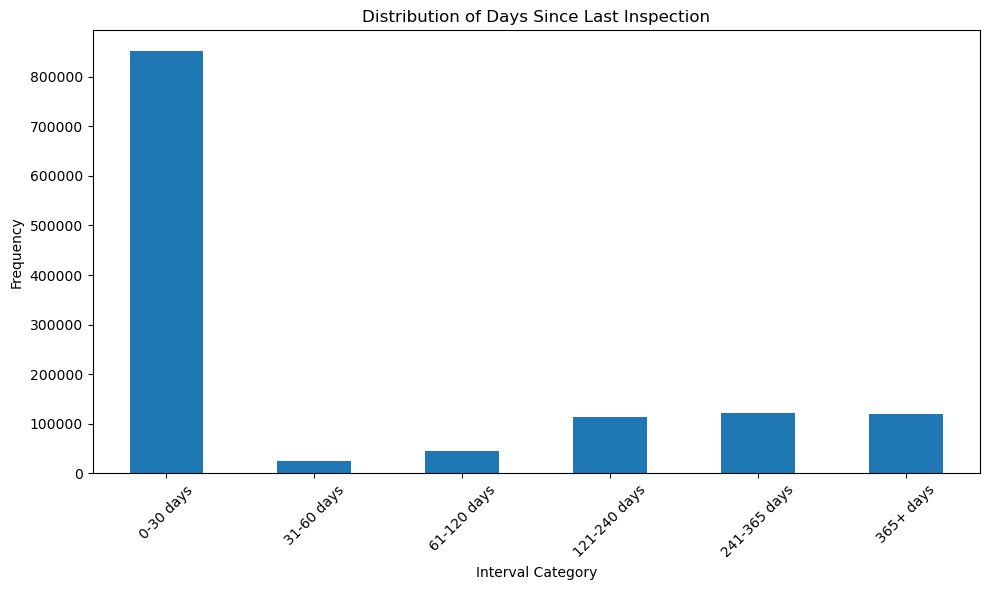

In [61]:
import matplotlib.pyplot as plt

# Assuming your dataframe with the 'days_since_last_inspection' column is called 'df'

# Define bin edges
bins = [0, 30, 60, 120, 240, 365, np.inf]
labels = ['0-30 days', '31-60 days', '61-120 days', '121-240 days', '241-365 days', '365+ days']

# Create a new column with the binned data
insp['inspection_interval_category'] = pd.cut(insp_sorted['days_since_last_inspection'], bins=bins, labels=labels, include_lowest=True)

# Calculate the frequency of each bin
bin_counts = insp['inspection_interval_category'].value_counts().sort_index()

# Display the results
print(bin_counts)

# Visualize the distribution
plt.figure(figsize=(10, 6))
bin_counts.plot(kind='bar')
plt.title('Distribution of Days Since Last Inspection')
plt.xlabel('Interval Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [63]:
insp['inspection_interval_category'].value_counts()

inspection_interval_category
0-30 days       851045
241-365 days    122261
365+ days       120515
121-240 days    114512
61-120 days      46061
31-60 days       24108
Name: count, dtype: int64

In [65]:
insp = insp.dropna(subset=['inspection_interval_category'])
insp['inspection_interval_category'].isnull().sum()


0

In [67]:
insp['days_since_last_inspection']=insp['inspection_interval_category']
insp['days_since_last_inspection'].astype('category')

0             365+ days
1          121-240 days
2             365+ days
3          121-240 days
4             0-30 days
               ...     
1310868    121-240 days
1310869    241-365 days
1310870    241-365 days
1310871    121-240 days
1310872       0-30 days
Name: days_since_last_inspection, Length: 1278502, dtype: category
Categories (6, object): ['0-30 days' < '31-60 days' < '61-120 days' < '121-240 days' < '241-365 days' < '365+ days']

 average violations per inspection over the past year

C:\Users\STSC\AppData\Local\Temp\ipykernel_5856\918828386.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  historical_rates = df_sorted.groupby('facility').apply(violation_rate)


                    facility date_of_inspection  historical_violation_rate
791492   #1 King's Buffet, A         2000-08-07                        6.0
624      #1 King's Buffet, A         2000-11-29                        6.0
5665     #1 King's Buffet, A         2001-12-28                        6.0
171314   #1 King's Buffet, A         2002-01-02                        6.0
210243   #1 King's Buffet, A         2002-11-07                        6.0
424342   #1 King's Buffet, A         2003-05-15                        6.0
318859   #1 King's Buffet, A         2003-12-19                        6.0
183207   #1 King's Buffet, A         2004-03-02                        6.0
331357   #1 King's Buffet, A         2004-11-22                        6.0
1142649  #1 King's Buffet, A         2005-07-28                        6.0
count    1.278502e+06
mean     4.721878e+00
std      4.135785e+00
min      0.000000e+00
25%      1.666667e+00
50%      4.000000e+00
75%      6.789474e+00
max      6.400000e+01

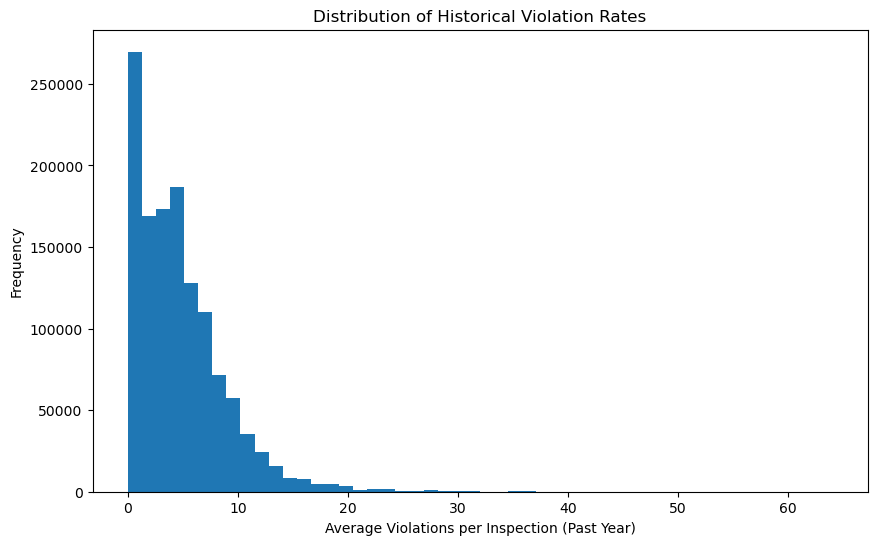

In [69]:
import pandas as pd
from datetime import timedelta

def calculate_historical_violation_rate(df, lookback_period=365):
    # Ensure date column is datetime
    df['date_of_inspection'] = pd.to_datetime(df['date_of_inspection'])
    
    # Sort the dataframe by facility and date
    df_sorted = df.sort_values(['facility', 'date_of_inspection'])
    
    # Function to calculate violation rate for a group
    def violation_rate(group):
        # Calculate the date one year before the current inspection
        one_year_ago = group['date_of_inspection'].max() - timedelta(days=lookback_period)
        
        # Filter inspections within the last year
        recent_inspections = group[group['date_of_inspection'] > one_year_ago]
        
        # Calculate average violations per inspection
        if len(recent_inspections) > 0:
            return (recent_inspections['total_critical_violations'].sum() + 
                    recent_inspections['total_noncritical_violations'].sum()) / len(recent_inspections)
        else:
            return 0  # Return 0 if no inspections in the past year

    # Apply the function to each facility group
    historical_rates = df_sorted.groupby('facility').apply(violation_rate)
    
    # Merge the rates back to the original dataframe
    df_with_rates = df_sorted.merge(historical_rates.rename('historical_violation_rate'), 
                                    left_on='facility', right_index=True)
    
    return df_with_rates

# Assuming your dataframe is called 'insp'
# Make sure it has columns: 'facility', 'date_of_inspection', 'TOTAL # CRITICAL VIOLATIONS', 'TOTAL # NONCRITICAL VIOLATIONS'

# Check if required columns are present
required_columns = ['facility', 'date_of_inspection', 'total_critical_violations', 'total_noncritical_violations']
missing_columns = [col for col in required_columns if col not in insp.columns]

if missing_columns:
    print(f"Error: The following required columns are missing: {', '.join(missing_columns)}")
else:
    insp_with_rates = calculate_historical_violation_rate(insp)

    # Display the first few rows to verify
    print(insp_with_rates[['facility', 'date_of_inspection', 'historical_violation_rate']].head(10))

    # Summary statistics of the historical violation rates
    print(insp_with_rates['historical_violation_rate'].describe())

    # Optionally, visualize the distribution of historical violation rates
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    plt.hist(insp_with_rates['historical_violation_rate'], bins=50)
    plt.title('Distribution of Historical Violation Rates')
    plt.xlabel('Average Violations per Inspection (Past Year)')
    plt.ylabel('Frequency')
    plt.show()

In [71]:
insp['historical_violation_rate']= insp_with_rates['historical_violation_rate']

In [73]:
insp['historical_violation_rate'].value_counts()

historical_violation_rate
0.000000    131547
1.000000     57184
3.000000     52854
2.000000     50952
5.000000     49178
             ...  
1.636364        11
3.636364        11
3.010678         6
3.766017         4
3.532034         2
Name: count, Length: 1909, dtype: int64

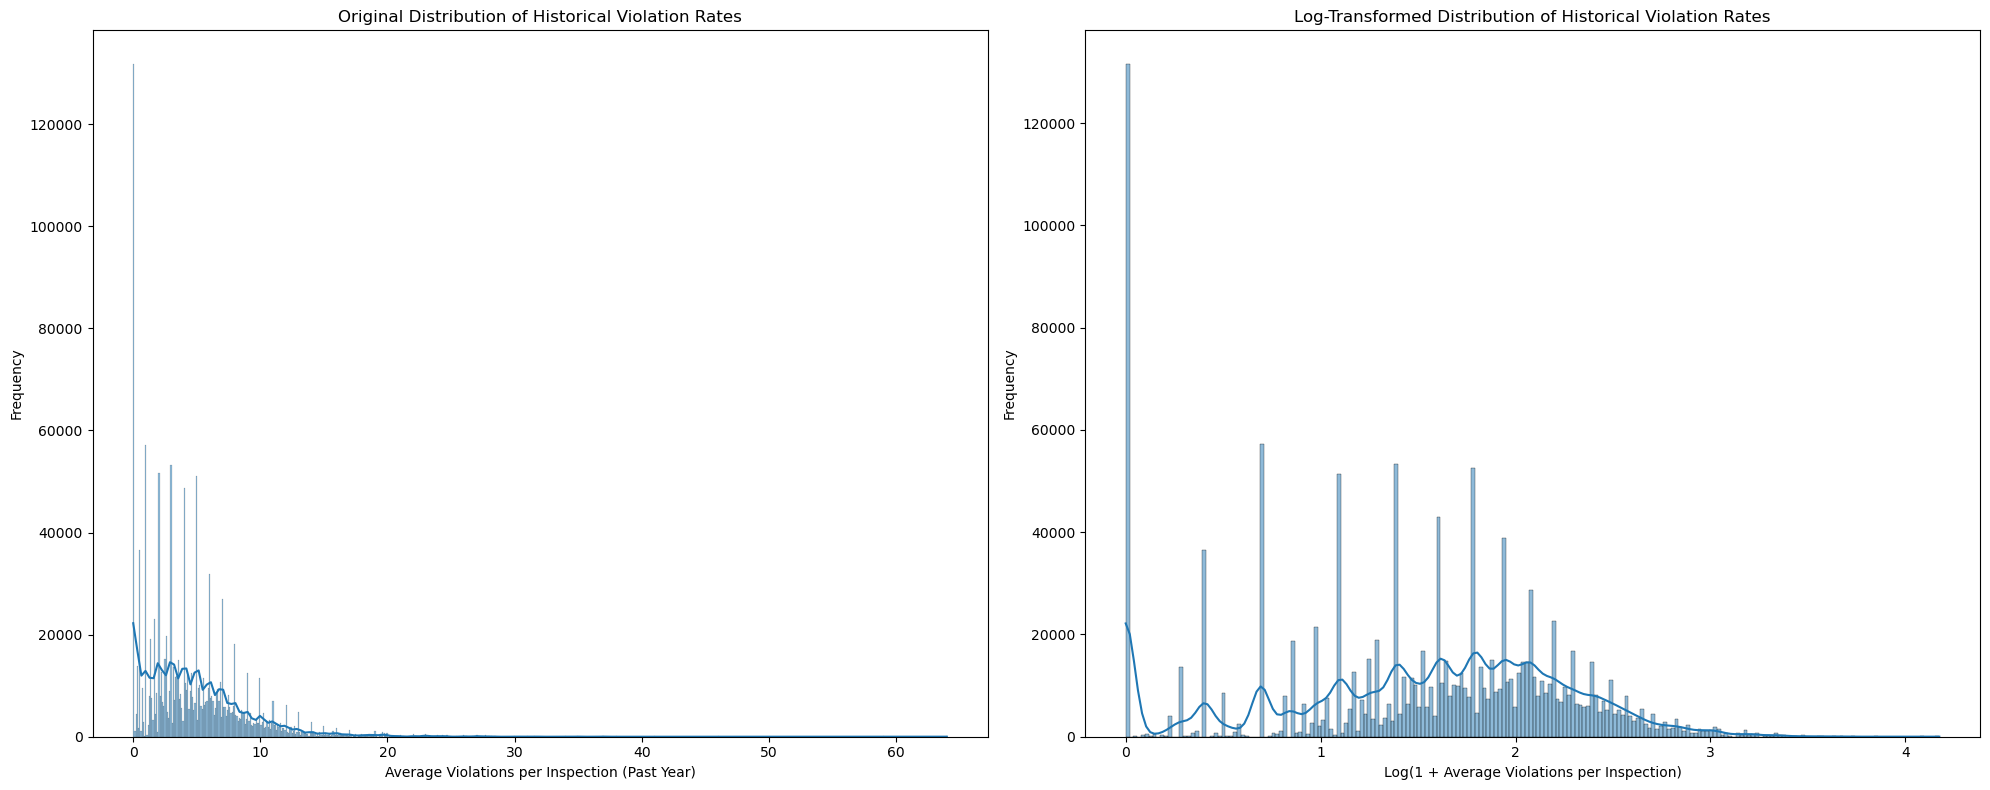

Original Data Summary:
count    1.278502e+06
mean     4.721878e+00
std      4.135785e+00
min      0.000000e+00
25%      1.666667e+00
50%      4.000000e+00
75%      6.789474e+00
max      6.400000e+01
Name: historical_violation_rate, dtype: float64

Log-Transformed Data Summary:
count    1.278502e+06
mean     1.476451e+00
std      7.772689e-01
min      0.000000e+00
25%      9.808293e-01
50%      1.609438e+00
75%      2.052773e+00
max      4.174387e+00
Name: log_historical_violation_rate, dtype: float64

Original Data Skewness: 1.8355
Log-Transformed Data Skewness: -0.3934


In [75]:
#HANDLING RIGHT SKEWNESS

import seaborn as sns


# Apply log transformation
insp['log_historical_violation_rate'] = np.log1p(insp['historical_violation_rate'])

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot original distribution
sns.histplot(insp['historical_violation_rate'], kde=True, ax=ax1)
ax1.set_title('Original Distribution of Historical Violation Rates')
ax1.set_xlabel('Average Violations per Inspection (Past Year)')
ax1.set_ylabel('Frequency')

# Plot log-transformed distribution
sns.histplot(insp['log_historical_violation_rate'], kde=True, ax=ax2)
ax2.set_title('Log-Transformed Distribution of Historical Violation Rates')
ax2.set_xlabel('Log(1 + Average Violations per Inspection)')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Print summary statistics for both original and transformed data
print("Original Data Summary:")
print(insp['historical_violation_rate'].describe())
print("\nLog-Transformed Data Summary:")
print(insp['log_historical_violation_rate'].describe())

# Calculate skewness for both distributions
original_skewness = insp['historical_violation_rate'].skew()
log_transformed_skewness = insp['log_historical_violation_rate'].skew()

print(f"\nOriginal Data Skewness: {original_skewness:.4f}")
print(f"Log-Transformed Data Skewness: {log_transformed_skewness:.4f}")

In [77]:
insp['avg_violation_per_insp_over_last_year'] = pd.cut(insp['log_historical_violation_rate'], 
                                      bins=[-3.95, 0.50, 1.08, 1.60], 
                                      labels=['Low', 'Moderate', 'High'])

In [79]:
insp['avg_violation_per_insp_over_last_year'].astype('category')

0          Moderate
1          Moderate
2               NaN
3               Low
4               Low
             ...   
1310868         NaN
1310869         Low
1310870         Low
1310871         Low
1310872         NaN
Name: avg_violation_per_insp_over_last_year, Length: 1278502, dtype: category
Categories (3, object): ['Low' < 'Moderate' < 'High']

In [81]:
insp['avg_violation_per_insp_over_last_year'].value_counts()

avg_violation_per_insp_over_last_year
High        278884
Low         190786
Moderate    146447
Name: count, dtype: int64

In [83]:
insp['food_service_type'].value_counts()

food_service_type
Food Service Establishment    1105231
Institutional Food Service     149864
SED Summer Feeding Prog.        13734
SOFA Food Service                9673
Name: count, dtype: int64

In [85]:
insp.shape

(1278502, 40)

COLUMN TRANSFORMER(one hot encd for cat and Standard scaler for num var)

In [87]:
ohe_columns = ['days_since_last_inspection','avg_violation_per_insp_over_last_year',  'food_service_type', 'inspection_type', 'violation_item']

insp = insp.dropna(how='any', subset=ohe_columns)  

null_values = insp[ohe_columns].isnull().sum()
print(null_values)

days_since_last_inspection               0
avg_violation_per_insp_over_last_year    0
food_service_type                        0
inspection_type                          0
violation_item                           0
dtype: int64


In [89]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
ct = ColumnTransformer([
    ('onehot', OneHotEncoder(sparse_output=True, dtype=np.float32), ohe_columns),  
    ('scaler', StandardScaler(), ['total_critical_violations',
                                  'total_crit_not_corrected',
                                  'total_noncritical_violations'])  
]) 

# Fit and transform the data
data_transformed = ct.fit_transform(insp)

In [91]:
data_transformed.shape

(616117, 111)

In [93]:
unique_values_counts = {col: insp[col].nunique() for col in ohe_columns}

# Print unique values counts
print(unique_values_counts)

{'days_since_last_inspection': 6, 'avg_violation_per_insp_over_last_year': 3, 'food_service_type': 4, 'inspection_type': 2, 'violation_item': 93}


PCA FOR DIMENSIONALITY REDUCTION

In [95]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix

# Assuming data_transformed is your dataset in sparse matrix format
data_sparse = csr_matrix(data_transformed)  # Example data, replace with your actual sparse data

# Define the number of components you want
n_components = 24  # Adjust as needed

# Create a TruncatedSVD object
svd = TruncatedSVD(n_components=n_components, random_state=42)

# Fit and transform the data
data_transformed_svd = svd.fit_transform(data_sparse)

# Print the explained variance ratio
print(f"Explained variance ratio: {svd.explained_variance_ratio_.sum():.4f}")


Explained variance ratio: 0.9505


In [97]:
svd_comp = svd.components_
svd_comp

array([[ 3.62159910e-01,  6.94433402e-02,  8.14679151e-02, ...,
         4.50820147e-02,  9.37526187e-03,  6.57196956e-02],
       [ 1.28545992e-01, -6.25150733e-02, -6.43192096e-02, ...,
         6.40531558e-01,  2.37713406e-01,  6.57742420e-01],
       [-5.33182316e-02,  2.30441708e-02,  2.33544446e-02, ...,
        -4.79440228e-02,  9.60995402e-01, -2.41269916e-01],
       ...,
       [-1.02831084e-01, -1.16808455e-01, -1.21625590e-01, ...,
         2.78741567e-03,  4.88683890e-05, -3.92821950e-04],
       [ 2.58731294e-02,  2.14133755e-02,  2.31145745e-02, ...,
         8.42636681e-03, -7.61713094e-05, -8.56504614e-03],
       [-1.85623086e-03,  5.48505770e-04,  1.13942757e-03, ...,
        -7.90081927e-04,  1.48608665e-04,  3.52404063e-04]])

In [99]:
svd.components_.shape

(24, 111)

changing output to category 

In [101]:
insp['critical_violation'] = insp['critical_violation'].astype('category')

In [103]:
# Create the SVD DataFrame
svd_df = pd.DataFrame(data_transformed_svd)
num_columns = svd_df.shape[1]
svd_df.columns = [f'Component_{i+1}' for i in range(num_columns)]

# Reset index for both DataFrames to ensure alignment
svd_df = svd_df.reset_index(drop=True)
insp = insp.reset_index(drop=True)

# Now join the critical_violation column
svd_df['critical_violation'] = insp['critical_violation']

# Verify the join
print("Number of null values in critical_violation:", svd_df['critical_violation'].isnull().sum())
print("First few rows of svd_df:")
print(svd_df.head())

Number of null values in critical_violation: 0
First few rows of svd_df:
   Component_1  Component_2  Component_3  Component_4  Component_5  \
0     1.468128    -1.375170     0.295384     0.330474     0.082400   
1     1.086013     0.185239     0.015472     0.176730     0.934647   
2     1.495236    -1.473926     0.341334     0.444566     0.446335   
3     1.215389    -1.214407     0.244352     0.218917    -0.143641   
4     0.863872    -1.352059     0.300414     0.332592     0.092645   

   Component_6  Component_7  Component_8  Component_9  Component_10  ...  \
0     0.556429    -0.661870    -0.725055     0.153754     -0.687221  ...   
1     0.364378    -0.134872    -1.017070     0.321726     -0.101757  ...   
2    -0.236175    -0.538893     0.271897     0.125340     -0.085590  ...   
3     0.166022    -0.250373     1.016807     1.239101      0.002955  ...   
4    -0.167634    -0.692223     0.591850     0.927528     -0.008019  ...   

   Component_16  Component_17  Component_18  Comp

In [105]:
svd_df.head()

,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10,...,Component_16,Component_17,Component_18,Component_19,Component_20,Component_21,Component_22,Component_23,Component_24,critical_violation
0,1.468128,-1.375170,0.295384,0.330474,0.082400,0.556429,-0.661870,-0.725055,0.153754,-0.687221,...,-0.001188,0.019679,0.003914,-0.009207,-0.028213,-0.000421,-0.047963,0.021203,-0.002884,Not Critical Violation
1,1.086013,0.185239,0.015472,0.176730,0.934647,0.364378,-0.134872,-1.017070,0.321726,-0.101757,...,-0.027754,0.088503,0.029138,0.103425,0.610203,-0.043761,0.172502,-0.088013,-0.002246,Not Critical Violation
2,1.495236,-1.473926,0.341334,0.444566,0.446335,-0.236175,-0.538893,0.271897,0.125340,-0.085590,...,-0.004172,0.006165,0.000541,-0.006975,-0.031349,0.001429,-0.042158,0.018870,-0.005264,Not Critical Violation
3,1.215389,-1.214407,0.244352,0.218917,-0.143641,0.166022,-0.250373,1.016807,1.239101,0.002955,...,0.004666,-0.004620,-0.005121,0.012306,0.084883,-0.035957,-0.101007,0.023616,0.000905,Not Critical Violation
4,0.863872,-1.352059,0.300414,0.332592,0.092645,-0.167634,-0.692223,0.591850,0.927528,-0.008019,...,0.020842,-0.018100,-0.002168,0.009176,-0.274906,0.108794,0.823222,-0.238277,0.014163,Not Critical Violation


In [107]:
svd_df.shape

(616117, 25)

In [109]:
svd_df.info(verbose=False,memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616117 entries, 0 to 616116
Columns: 25 entries, Component_1 to critical_violation
dtypes: category(1), float64(24)
memory usage: 113.4 MB


In [111]:
svd_df.dtypes

Component_1            float64
Component_2            float64
Component_3            float64
Component_4            float64
Component_5            float64
Component_6            float64
Component_7            float64
Component_8            float64
Component_9            float64
Component_10           float64
Component_11           float64
Component_12           float64
Component_13           float64
Component_14           float64
Component_15           float64
Component_16           float64
Component_17           float64
Component_18           float64
Component_19           float64
Component_20           float64
Component_21           float64
Component_22           float64
Component_23           float64
Component_24           float64
critical_violation    category
dtype: object

MEMORY MANAGMENT

In [113]:
cols_to_change = svd_df.columns.drop('critical_violation')
svd_df[cols_to_change] = svd_df[cols_to_change].astype(np.float16)


In [115]:
svd_df.info(verbose=False,memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616117 entries, 0 to 616116
Columns: 25 entries, Component_1 to critical_violation
dtypes: category(1), float16(24)
memory usage: 28.8 MB


CLASS IMBALANCE

In [117]:
svd_df['critical_violation'].value_counts()

critical_violation
Not Critical Violation    549705
Critical Violation         66412
Name: count, dtype: int64

LABEL ENCODING THE TARGET

In [119]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
svd_df['critical_violation']= le.fit_transform(svd_df['critical_violation'])

In [121]:
svd_df.sample(5)

,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10,...,Component_16,Component_17,Component_18,Component_19,Component_20,Component_21,Component_22,Component_23,Component_24,critical_violation
168935,1.781250,-0.330322,-0.108093,-0.594238,-0.775879,-0.078735,0.251709,0.188843,-0.110413,0.008408,...,0.060089,-0.355225,-0.632324,0.627441,-0.034180,0.017532,0.014732,0.073303,0.000651,1
366518,1.467773,-1.375000,0.295410,0.330566,0.082397,0.556641,-0.662109,-0.725098,0.153809,-0.687012,...,-0.001188,0.019684,0.003914,-0.009209,-0.028214,-0.000421,-0.047974,0.021210,-0.002884,1
614706,1.041016,-1.444336,0.341064,0.461182,0.656250,0.420410,0.651367,-1.078125,0.236816,-0.095337,...,-0.004448,-0.012482,-0.003885,-0.000050,-0.039642,-0.006710,-0.038208,0.018936,0.006130,1
185292,1.122070,-1.065430,0.198730,0.184326,-0.022751,1.046875,1.252930,-0.247559,-0.071411,0.005646,...,0.021622,-0.135376,-0.045776,-0.134155,-0.009254,-0.022263,-0.007240,-0.101013,0.002195,1
547002,1.728516,1.397461,-0.135132,2.130859,-0.486816,1.063477,-0.017761,-0.089539,-0.025208,-0.009903,...,0.044617,-0.288818,-0.612305,0.667969,-0.030273,0.026199,0.023590,0.102905,-0.002026,1


MODEL FITTING

In [125]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from scipy.sparse import csr_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [129]:
X = svd_df.drop('critical_violation',axis=1)
y = svd_df['critical_violation']

# Split the data
X_,X_test,y_,y_test = train_test_split(X,y,test_size =0.2,random_state = 42)
X_train,X_val,y_train,y_val = train_test_split(X_,y_,test_size=0.2,random_state=42)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)


(394314, 24) (394314,)
(98579, 24) (98579,)
(123224, 24) (123224,)


LOGISITIC REGRESSION

In [76]:
logreg = LogisticRegression()

# Train the model on the training data
logreg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.932594299811725
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.54      0.63     13344
           1       0.95      0.98      0.96    109880

    accuracy                           0.93    123224
   macro avg       0.86      0.76      0.80    123224
weighted avg       0.93      0.93      0.93    123224

Confusion Matrix:
[[  7174   6170]
 [  2136 107744]]


FINE TUNE LOG REG

In [77]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = [
    {
        'C': [0.1, 1, 10, 100, 1000],
        'penalty': ['l2'],
        'class_weight': ['balanced']
    }
]

# Initialize the GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best hyperparameters to train a new LogisticRegression model
best_logreg = LogisticRegression(**grid_search.best_params_)
best_logreg.fit(X_train, y_train)

# Evaluate the best model on the test data
y_pred = best_logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Best hyperparameters: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2'}
Best score: 0.9016196172073092
Accuracy: 0.9002710510939428
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.91      0.66     13344
           1       0.99      0.90      0.94    109880

    accuracy                           0.90    123224
   macro avg       0.76      0.90      0.80    123224
weighted avg       0.94      0.90      0.91    123224

Confusion Matrix:
[[12104  1240]
 [11049 98831]]


RANDOM FOREST

In [78]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9883220801142635
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     13344
           1       0.99      1.00      0.99    109880

    accuracy                           0.99    123224
   macro avg       0.98      0.96      0.97    123224
weighted avg       0.99      0.99      0.99    123224

Confusion Matrix:
[[ 12199   1145]
 [   294 109586]]


GRADIENT BOOSTING

In [79]:
gb_params = {
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 4,
    'subsample': 0.9,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'random_state': 42
}

# Initialize the GradientBoostingClassifier with the chosen hyperparameters
gb = GradientBoostingClassifier(**gb_params)

# Fit the model to the training data
gb.fit(X_train, y_train)

# Predict on the test set
y_pred = gb.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {test_accuracy}")

# Generate classification report
class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy on test set: 0.9790462896838278
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     13344
           1       0.99      0.99      0.99    109880

    accuracy                           0.98    123224
   macro avg       0.95      0.94      0.95    123224
weighted avg       0.98      0.98      0.98    123224

Confusion Matrix:
[[ 11902   1442]
 [  1140 108740]]


SUPPORT VECTOR MACHINE

In [80]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initializing the SVM classifier
svm_classifier = SVC(C=1, kernel='rbf', gamma=0.1, class_weight='balanced')

# Fitting the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Making predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generating a classification report
report = classification_report(y_test, y_pred)

# Printing the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.95      0.75     13344
           1       0.99      0.93      0.96    109880

    accuracy                           0.93    123224
   macro avg       0.80      0.94      0.85    123224
weighted avg       0.95      0.93      0.94    123224



In [133]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [131]:
train_df = pd.DataFrame(X_train).assign(target=y_train)
val_df = pd.DataFrame(X_val).assign(target=y_val)
test_df = pd.DataFrame(X_test).assign(target=y_test)

In [137]:
def split_data(data):
    X = data.drop('target', axis=1)
    y = data['target']
    return X, y

data = pd.concat([train_df, val_df], axis=0)
X_data, y_data = split_data(data)
print(X_data.shape, y_data.shape)

(492893, 24) (492893,)


In [139]:
algorithms = {
    'logistic regression': LogisticRegression(class_weight='balanced', random_state=42),
    'random_forest': RandomForestClassifier(class_weight='balanced',n_estimators=100, random_state=42),
    'Gradient Boosting with SMOTE': ImbPipeline(steps=[
        ('smote', SMOTE(random_state=42)),
        ('gb', GradientBoostingClassifier(n_estimators = 100,
    learning_rate =  0.1,
     max_depth =  4,
     subsample = 0.9,
     min_samples_split = 5,
    min_samples_leaf= 2,
    random_state = 42))
    ]),
    'XGBOOST CLASSIFIER': XGBClassifier(scale_pos_weight=(len(y_data) - sum(y_data)) / sum(y_data), random_state=42,
    learning_rate=0.01,
    n_estimators=1000,
    max_depth=7,
    min_child_weight=1,
    gamma=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    nthread=4,
    seed=42,
    use_label_encoder=False)
    
}

In [141]:
def plot_curves(sizes, mean_scores, std_scores, label, ax):
	ax.plot(
		sizes,
		mean_scores,
		marker="o",
		label=label
	)

	ax.fill_between(
		x=sizes,
		y1=mean_scores - std_scores,
		y2=mean_scores + std_scores,
		alpha=0.5
	)

In [143]:
def plot_learning_curves(name, algorithm, figsize=(12, 4),fit_params={}):
	train_sizes, train_scores, test_scores = learning_curve(
		estimator=algorithm,
		X=X_data,
		y=y_data,
		cv=3,
		scoring="accuracy",
		n_jobs=-1,
		random_state=42
	)
	
	mean_train_scores = np.mean(train_scores, axis=1)
	std_train_scores = np.std(train_scores, axis=1)
	train_score = f"{mean_train_scores[-1]:.2f} +/- {std_train_scores[-1]:.2f}"

	mean_test_scores = np.mean(test_scores, axis=1)
	std_test_scores = np.std(test_scores, axis=1)
	test_score = f"{mean_test_scores[-1]:.2f} +/- {std_test_scores[-1]:.2f}"

	fig, ax = plt.subplots(figsize=figsize)

	# training curve
	plot_curves(
		train_sizes,
		mean_train_scores,
		std_train_scores,
		f"Train ({train_score})",
		ax
	)

	# test curve
	plot_curves(
		train_sizes,
		mean_test_scores,
		std_test_scores,
		f"Test ({test_score})",
		ax
	)

	ax.set(xlabel="Training Set Size", ylabel="Accuracy", title=name)

	ax.legend(loc="lower right")

	plt.show()

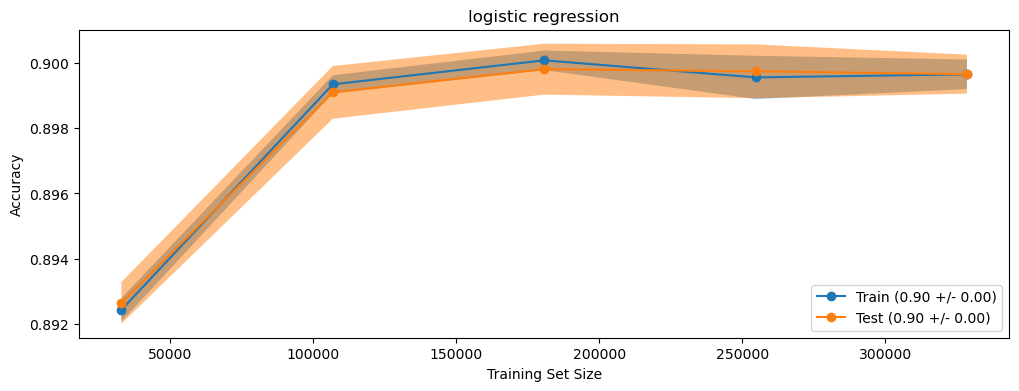

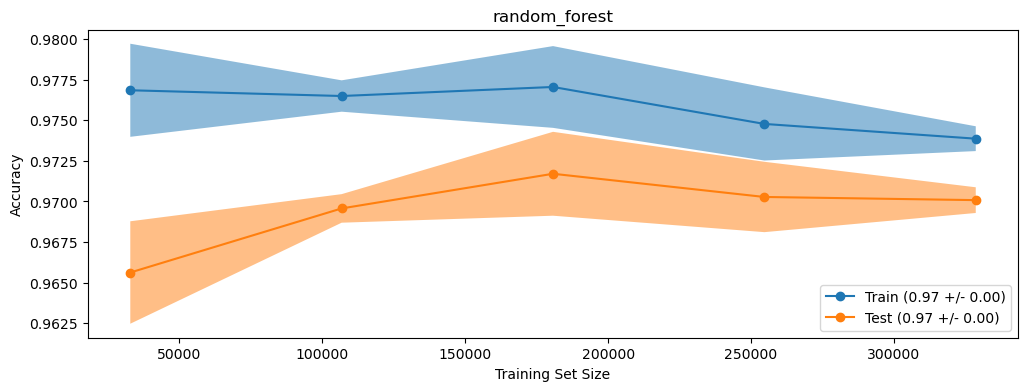

C:\Users\STSC\anaconda3\envs\NYFDPRED\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\STSC\anaconda3\envs\NYFDPRED\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\STSC\anaconda3\envs\NYFDPRED\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\STSC\anaconda3\envs\NYFDPRED\Lib\site-packages\imblearn\pipeline

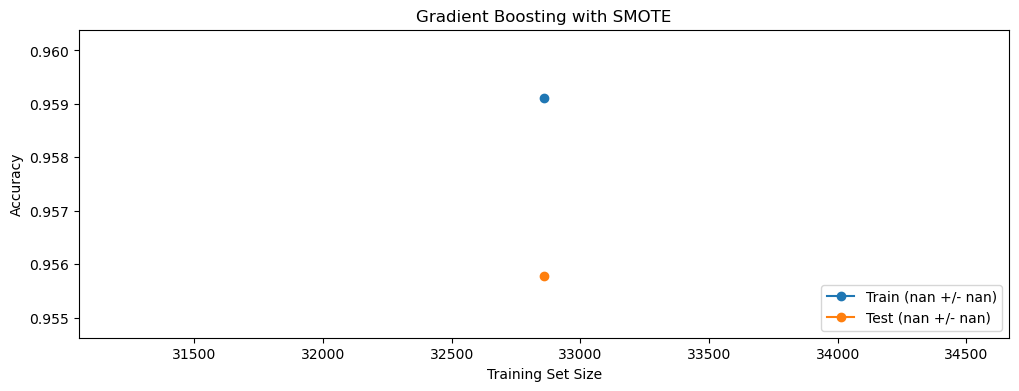

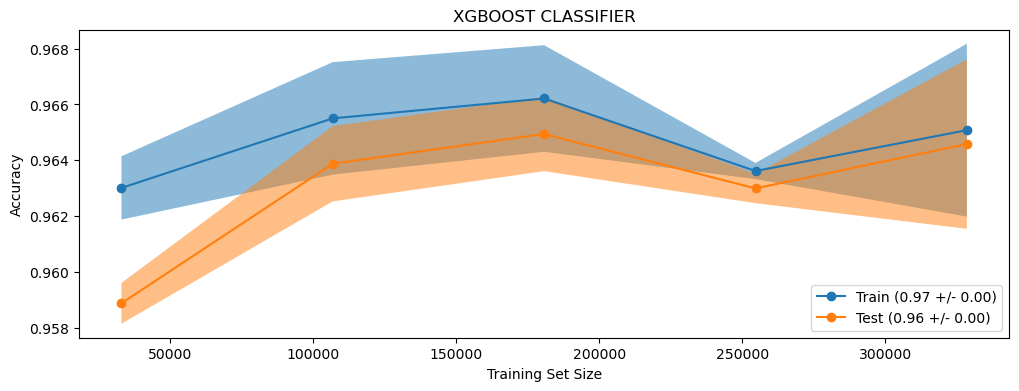

In [145]:
for name, alg in algorithms.items():
	plot_learning_curves(name, alg)

In [147]:
from sklearn.metrics import classification_report, roc_auc_score

def model_eval(X, y, X_test, y_test, models):
    reports = {}
    for i, model in enumerate(models):
        model.fit(X, y)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_pred_proba)
        reports[f'model_{i}'] = {
            'classification_report': classification_report(y_test, y_pred, zero_division=0),
            'roc_auc': auc
        }
    return reports

for name, alg in algorithms.items():
    reports = model_eval(X_data, y_data, X_test, y_test, [alg])
    print(f"Classification Report for {name}:")
    print(reports[f'model_0']['classification_report'])
    print(f"ROC AUC: {reports[f'model_0']['roc_auc']:.4f}")
    print("\n")

Classification Report for logistic regression:
              precision    recall  f1-score   support

           0       0.52      0.91      0.66     13344
           1       0.99      0.90      0.94    109880

    accuracy                           0.90    123224
   macro avg       0.75      0.90      0.80    123224
weighted avg       0.94      0.90      0.91    123224

ROC AUC: 0.9402


Classification Report for random_forest:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89     13344
           1       0.99      0.98      0.99    109880

    accuracy                           0.97    123224
   macro avg       0.91      0.96      0.94    123224
weighted avg       0.98      0.97      0.97    123224

ROC AUC: 0.9961


Classification Report for Gradient Boosting with SMOTE:
              precision    recall  f1-score   support

           0       0.74      0.95      0.84     13344
           1       0.99      0.96      0.98    109880

  